<a href="https://colab.research.google.com/github/Zaedul-Islam/Kaggle/blob/master/Titanic%20-%20Machine%20Learning%20from%20Disaster/Titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Titanic: Machine Learning from Disaster**

## **Step 1: Read Train & Test datasets**

In [0]:
# Importing pandas library
#  pandas - The best Python library to import and manage datasets 
import pandas as pd

# Importing Test & Train dataset
train = pd.read_csv('/content/drive/My Drive/Colab Notebooks/Kaggle/Titanic - Machine Learning from Disaster/Dataset/train.csv')
test = pd.read_csv('/content/drive/My Drive/Colab Notebooks/Kaggle/Titanic - Machine Learning from Disaster/Dataset/test.csv')

## **Step 2: Exploratory Data Analysis**

In [53]:
# Display first 5 rows of train dataset
train.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [54]:
# Display first 5 rows of train dataset
test.head(5)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


**Findings:** 
1. Dataset contains both Categorical and Continuous attribute
2. NaN indicates data is missing for that particular cell. That means both the train and test dataset contain missing data




In [55]:
# Figure out the dimensions of train dataset
train.shape

(891, 12)

In [56]:
# Figure out the dimensions of test dataset
test.shape

(418, 11)

In [57]:
# Pints information about a train DataFrame 
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


**Findings:**
1. Huge number of data is missing in **Cabin**  variable. There are also missing values in **Age** and **Embarked** columns.

In [58]:
# Pints information about a test DataFrame 
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


**Findings:**
1. In the test dataset, huge number of data is missing in **Cabin**  variable as well. There are also missing values in **Age** and **Fare** columns.

In [59]:
# To ge the number of missing values in each column of train dataset
# 'isnull()' detect missing values. NA values, such as None or numpy.NaN, gets mapped to True values. Everything else gets mapped to False values
# Finally, 'sum()' summing up the missing values in each column
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [60]:
# To ge the number of missing values in each column of test dataset
# 'isnull()' detect missing values. NA values, such as None or numpy.NaN, gets mapped to True values. Everything else gets mapped to False values
# Finally, 'sum()' summing up the missing values in each column
test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

## **Step 3: Data Visualization**

In [0]:
# Importing 'matplotlib' library
#  matplotlib - The Python library is needed to plot nice charts
import matplotlib.pyplot as plt

# To accomodate visualization charts in Jupyter Notebook 'inline' method is introduced
%matplotlib inline

# Importing 'seaborn' library
# 'seaborn' - a matplotlib based statistical graphical library
import seaborn as sns
sns.set()

### **First draw bar charts on Categorical features**
1. Sex
2. SibSp
3. Parch
4. Pclass
5. Cabin
6. Embarked




In [0]:
def drawBarChart(feature):
    survived = train[train['Survived'] == 1][feature].value_counts()
    dead = train[train['Survived'] == 0][feature].value_counts()
    df = pd.DataFrame([survived, dead])
    df.index = ['Survived', 'Dead']
    df.plot(kind = 'bar', stacked = True, figsize = (10, 5))

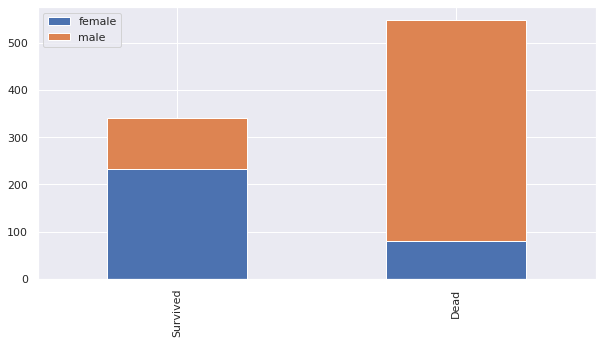

In [63]:
drawBarChart('Sex')

**Findings:**
1.  More female were survived that male in the titanic ship

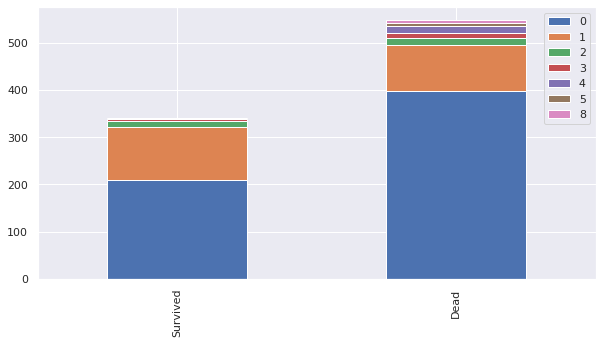

In [64]:
drawBarChart('SibSp')

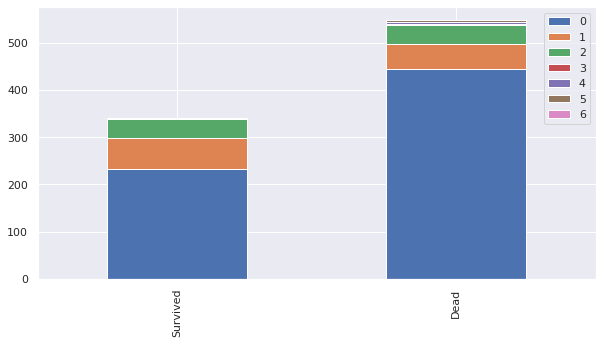

In [65]:
drawBarChart('Parch')

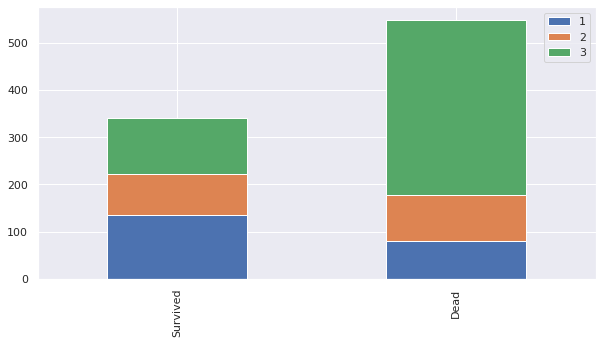

In [66]:
drawBarChart('Pclass')

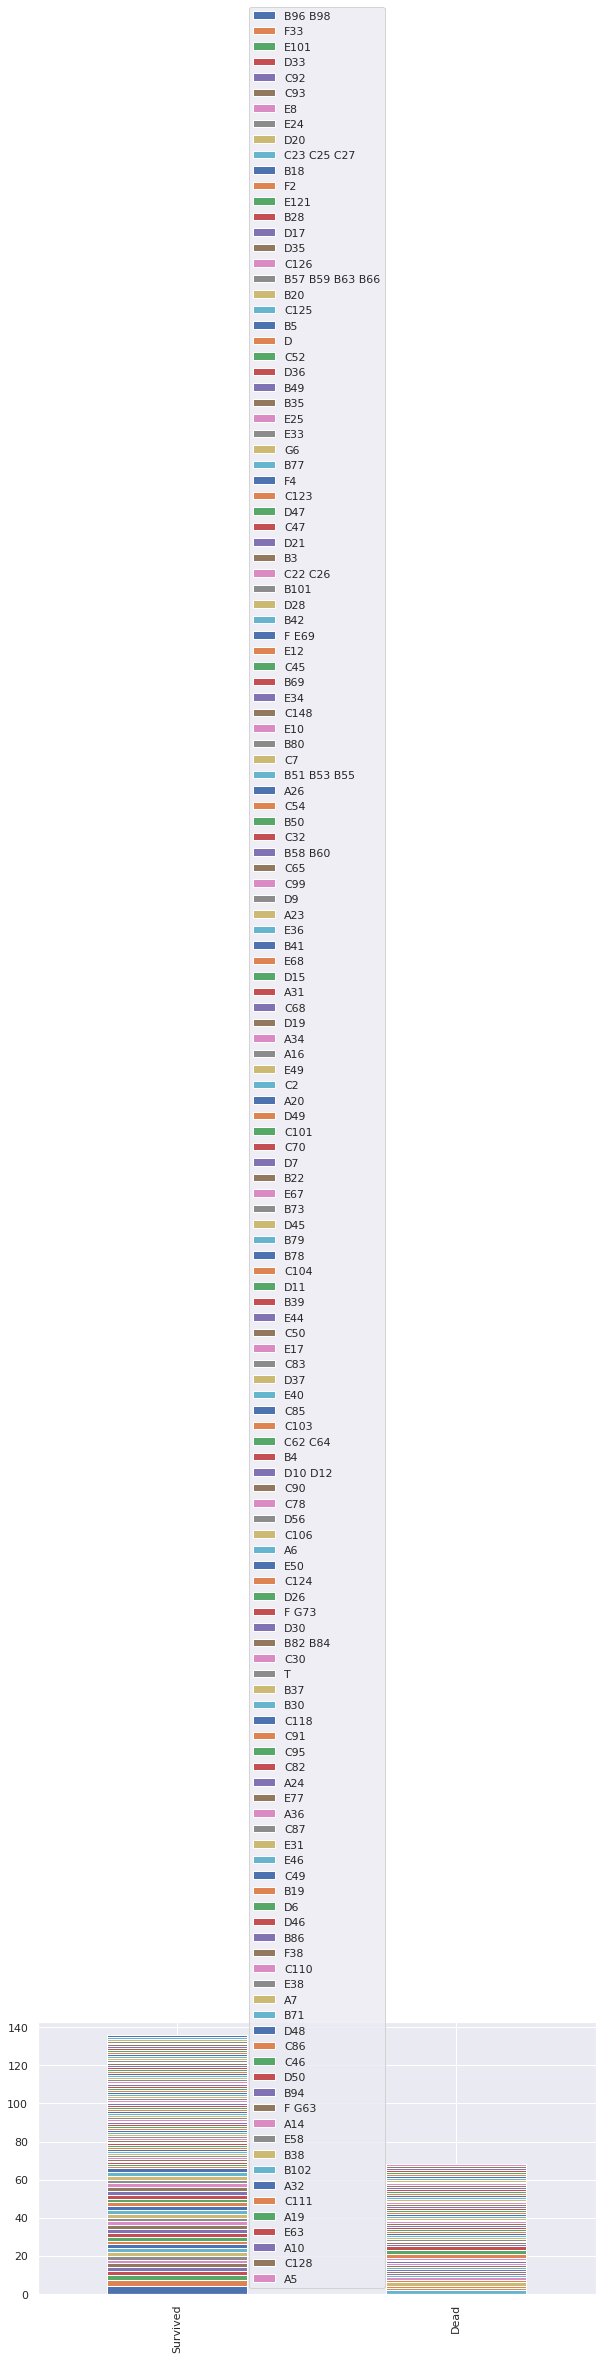

In [67]:
drawBarChart('Cabin')

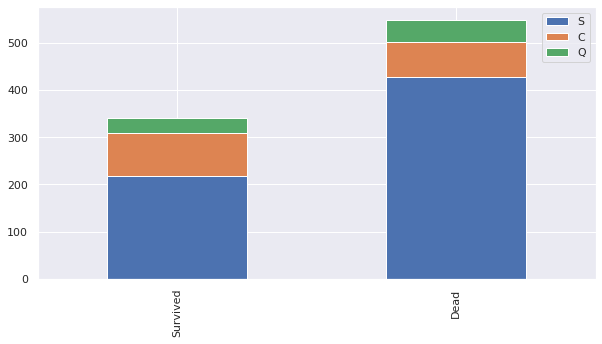

In [68]:
drawBarChart('Embarked')

## **Step 4: Feature Engineering**

### **1. Name**

In [0]:
# Add a new column called 'Title' to both 'train' & 'test' datasets from the corresponding 'Name' columns
# 'Title' column contains only the title for the person
trainTestDatasets = [train, test]

for dataset in trainTestDatasets:
    dataset['Title'] = dataset['Name'].str.extract(' ([A-Za-z]+)\.', expand = False)

In [70]:
# Show the counts of 'Title' attribute of 'Train' dataset
train['Title'].value_counts()

Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Major         2
Col           2
Mlle          2
Mme           1
Ms            1
Sir           1
Capt          1
Jonkheer      1
Lady          1
Countess      1
Don           1
Name: Title, dtype: int64

In [71]:
# Show the counts of 'Title' attribute of 'Test' dataset
test['Title'].value_counts()

Mr        240
Miss       78
Mrs        72
Master     21
Col         2
Rev         2
Dona        1
Ms          1
Dr          1
Name: Title, dtype: int64

**Map title to numbers**
* Mr: 0
* Miss: 1
* Mrs: 2
* Others: 3

In [0]:
titleMapping = {"Mr": 0, "Miss": 1, "Mrs": 2, 
                 "Master": 3, "Dr": 3, "Rev": 3, "Col": 3, "Major": 3, "Mlle": 3,"Countess": 3,
                 "Ms": 3, "Lady": 3, "Jonkheer": 3, "Don": 3, "Dona" : 3, "Mme": 3,"Capt": 3,"Sir": 3 }

for dataset in trainTestDatasets:
    dataset['Title'] = dataset['Title'].map(titleMapping)

In [73]:
# Observe the 'Title' variable in 'Train' dataset
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,2
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,2
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0


In [74]:
# Observe the 'Title' variable in 'Test' dataset
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,2
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,0
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,2


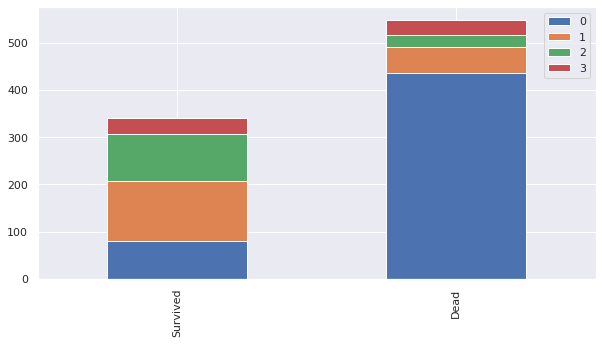

In [75]:
drawBarChart('Title')

In [0]:
# Delete unnecessary feature (i.e. 'Name') from both the 'Train' & 'Test' datasets
train.drop('Name', axis = 1, inplace = True)
test.drop('Name', axis = 1, inplace = True)

In [77]:
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,male,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,1,female,38.0,1,0,PC 17599,71.2833,C85,C,2
2,3,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,female,35.0,1,0,113803,53.1000,C123,S,2
4,5,0,3,male,35.0,0,0,373450,8.0500,NaN,S,0


In [78]:
test.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,892,3,male,34.5,0,0,330911,7.8292,NaN,Q,0
1,893,3,female,47.0,1,0,363272,7.0000,NaN,S,2
2,894,2,male,62.0,0,0,240276,9.6875,NaN,Q,0
3,895,3,male,27.0,0,0,315154,8.6625,NaN,S,0
4,896,3,female,22.0,1,1,3101298,12.2875,NaN,S,2


### **2. Sex**

**Map Sex attribute to numbers as follows**
* male: 0
* female: 1



In [0]:
sexMapping = {"male": 0, "female": 1}

for dataset in trainTestDatasets:
    dataset['Sex'] = dataset['Sex'].map(sexMapping)

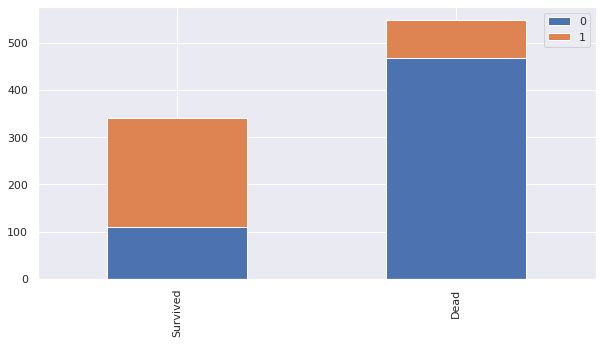

In [80]:
drawBarChart('Sex')

### **3. Age**

**3.1. Filling up missing data by taking the average of goup Title**

Fill up the missing values in each cell of **Age** column by the taking the average age of corresponding group **Title**. This will facilitate the **Random Forest Ensemble Classifier**. **Age** is one of the most important classifiers here.

In [0]:
# Fill missing ages with median age for each title (Mr, Mrs, Miss, Others)
train['Age'].fillna(train.groupby('Title')['Age'].transform('median'), inplace = True)
test['Age'].fillna(test.groupby('Title')['Age'].transform('median'), inplace = True)

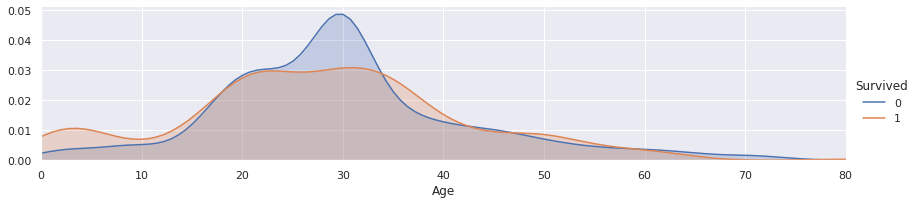

In [82]:
facet = sns.FacetGrid(train, hue = "Survived", aspect = 4)
facet.map(sns.kdeplot, 'Age', shade = True)

# Taking the maximum age as highest limit
facet.set(xlim = (0, train['Age'].max()))

facet.add_legend()

plt.show()

**Findings:**
1. From the graph, most of the passengers died were of age *30*
2. Most of the passengers survived were of age between *20 to 34*


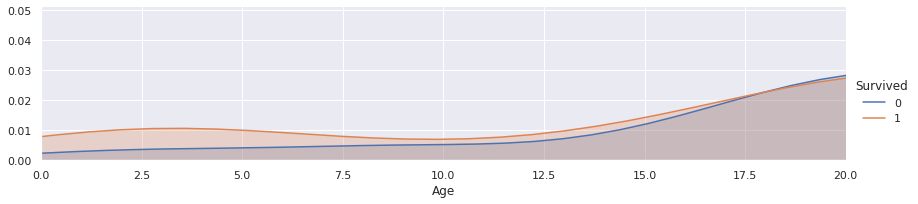

In [83]:
facet = sns.FacetGrid(train, hue = "Survived", aspect = 4)
facet.map(sns.kdeplot, 'Age', shade = True)
facet.set(xlim = (0, train['Age'].max()))
facet.add_legend()

# Plotting the age range between 0 to 20
plt.xlim(0, 20)

plt.show()

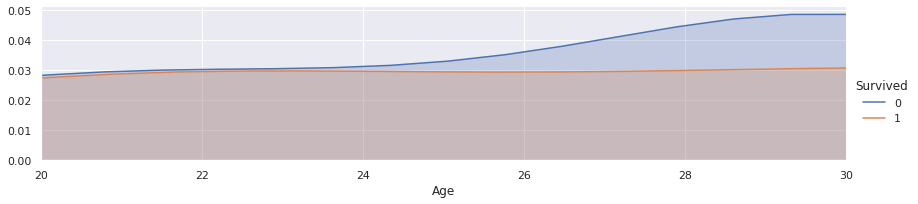

In [84]:
facet = sns.FacetGrid(train, hue="Survived",aspect=4)
facet.map(sns.kdeplot,'Age',shade= True)
facet.set(xlim=(0, train['Age'].max()))
facet.add_legend()

# Plotting the age range between 20 to 30
plt.xlim(20, 30)

plt.show()

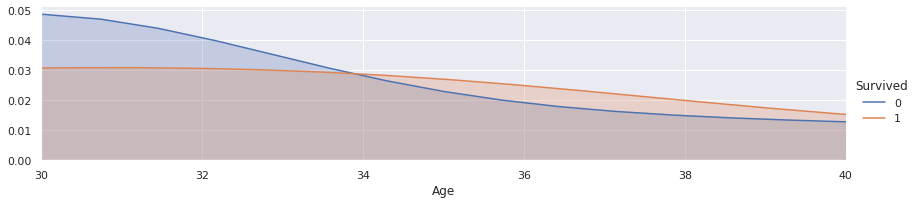

In [85]:
facet = sns.FacetGrid(train, hue="Survived",aspect=4)
facet.map(sns.kdeplot,'Age',shade= True)
facet.set(xlim=(0, train['Age'].max()))
facet.add_legend()

# Plotting the age range between 30 to 40
plt.xlim(30, 40)

plt.show()

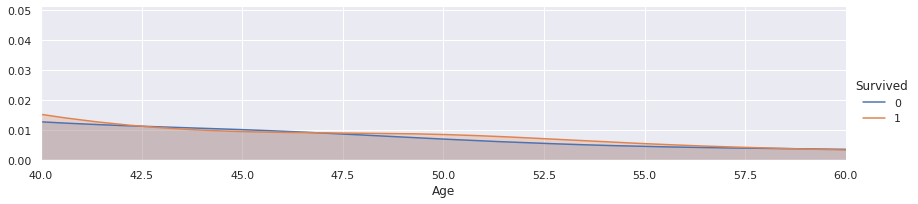

In [86]:
facet = sns.FacetGrid(train, hue="Survived",aspect=4)
facet.map(sns.kdeplot,'Age',shade= True)
facet.set(xlim=(0, train['Age'].max()))
facet.add_legend()

# Plotting the age range between 40 to 60
plt.xlim(40, 60)

plt.show()

In [87]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Sex          891 non-null    int64  
 4   Age          891 non-null    float64
 5   SibSp        891 non-null    int64  
 6   Parch        891 non-null    int64  
 7   Ticket       891 non-null    object 
 8   Fare         891 non-null    float64
 9   Cabin        204 non-null    object 
 10  Embarked     889 non-null    object 
 11  Title        891 non-null    int64  
dtypes: float64(2), int64(7), object(3)
memory usage: 83.7+ KB


In [88]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Sex          418 non-null    int64  
 3   Age          418 non-null    float64
 4   SibSp        418 non-null    int64  
 5   Parch        418 non-null    int64  
 6   Ticket       418 non-null    object 
 7   Fare         417 non-null    float64
 8   Cabin        91 non-null     object 
 9   Embarked     418 non-null    object 
 10  Title        418 non-null    int64  
dtypes: float64(2), int64(6), object(3)
memory usage: 36.0+ KB


**Findings:**
1. No more missing values in both Train & Test dataset

**3.2. Dividing ages into 5 different categories**

Converting Age to Catergorical value from Continuous value

1. Child: 0 (age <= 16)
2. Young: 1 (age > 16 && age <= 26)
3. Adult: 2 (age > 26 && age <= 36)
4. Mid-age: 3 (age > 36 && age <= 62) 
5. Senior: 4 (age > 62)

In [0]:
for dataset in trainTestDatasets:
    dataset.loc[dataset['Age'] <= 16, 'Age'] = 0,
    dataset.loc[(dataset['Age'] > 16) & (dataset['Age'] <= 26), 'Age'] = 1,
    dataset.loc[(dataset['Age'] > 26) & (dataset['Age'] <= 36), 'Age'] = 2,
    dataset.loc[(dataset['Age'] > 36) & (dataset['Age'] <= 62), 'Age'] = 3,
    dataset.loc[dataset['Age'] > 62, 'Age'] = 4,

In [91]:
train.head(5)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,0,1.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,1,1,3.0,1,0,PC 17599,71.2833,C85,C,2
2,3,1,3,1,1.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,1,2.0,1,0,113803,53.1000,C123,S,2
4,5,0,3,0,2.0,0,0,373450,8.0500,NaN,S,0


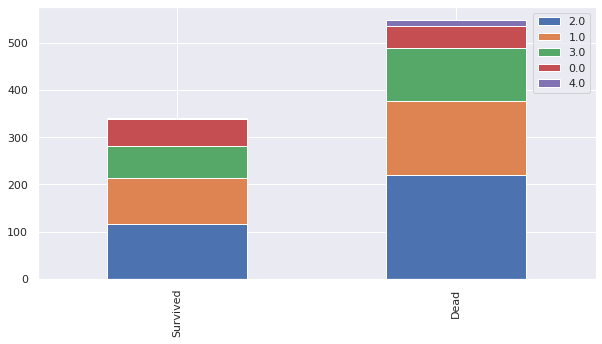

In [92]:
drawBarChart('Age')